# Multiple Regression

## Learning goals:

For a multivariable linear regression, students will be able to:

* compare and contrast with univariable linear regression
* write an example of the equation
* develop one with statsmodels 
* assess the model fit 
* validate the model


### Keyterms
- Multivariable
- Train-test split
- MSE: Mean squared error
- RSME: Root squared mean error


## Scenario

The University of San Paulo in Brazil is likes to party. We are a contracted beer supplier to the University and we want to make sure we have enough supply on hand. We are hoping to build a model that can predict beer consumption given other variables. 


![beer](pexels-photo-544988-small.jpeg)
More about the dataset can be found [here](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo)


###  Prior Knowledge


Before looking at the dataset, what variables do we think might be in there? What might make a student drink more? 

#### Step 1:  Discussion 

- compare and contrast with univariable linear regression
- How is this different from the regression we've done before?
- Here, you'll explore how to perform linear regressions using multiple independent variables to better predict a target variable.

#### Step 2:  Develop a multivariable regression model with statsmodels 

**Load Libraries and load in data**

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Consumo_cerveja.csv')

In [8]:
df_comma = pd.read_csv('Consumo_cerveja.csv', decimal=",", parse_dates=['Data'])

In [12]:
df_comma['Consumo de cerveja (litros)'] = pd.to_numeric(df_comma['Consumo de cerveja (litros)'])


In [13]:
df_comma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
Data                           365 non-null datetime64[ns]
Temperatura Media (C)          365 non-null float64
Temperatura Minima (C)         365 non-null float64
Temperatura Maxima (C)         365 non-null float64
Precipitacao (mm)              365 non-null float64
Final de Semana                365 non-null float64
Consumo de cerveja (litros)    365 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 51.5 KB


In [14]:
df = df_comma

In [15]:
# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
Data                           365 non-null datetime64[ns]
Temperatura Media (C)          365 non-null float64
Temperatura Minima (C)         365 non-null float64
Temperatura Maxima (C)         365 non-null float64
Precipitacao (mm)              365 non-null float64
Final de Semana                365 non-null float64
Consumo de cerveja (litros)    365 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 51.5 KB


### Small Data Cleaning Tasks:
- Drop Date
- convert all the columns to numeric (replace ',' with '.')
- rename columns to be `name = ['temp-median', 'temp-min', 'temp-max', 'rain', 'finals-week', 'target']`

In [17]:
# clean data here
df.drop('Data', inplace=True, axis=1)

In [18]:
df.columns = ['temp-median', 'temp-min', 'temp-max', 'rain', 'finals-week', 'target']

In [19]:
df.info()
# df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 6 columns):
temp-median    365 non-null float64
temp-min       365 non-null float64
temp-max       365 non-null float64
rain           365 non-null float64
finals-week    365 non-null float64
target         365 non-null float64
dtypes: float64(6)
memory usage: 44.2 KB


**Check** for NaNs

In [20]:
df.isna().sum()

temp-median    576
temp-min       576
temp-max       576
rain           576
finals-week    576
target         576
dtype: int64

In [21]:
df.dropna(inplace=True)

In [22]:
df.shape

(365, 6)

### Everyone write an example of an equation for our multiple regression

The main idea here is pretty simple. Whereas, in simple linear regression we took our dependent variable to be a function only of a single independent variable, here we'll be taking the dependent variable to be a function of multiple independent variables.

<img src="https://miro.medium.com/max/1400/1*d0icRnPHWjHSNXxuoYT5Vg.png" width=450 />

Our regression equation, then, instead of looking like $\hat{y} = mx + b$, will now look like:

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x_1 + ... + \hat{\beta}_nx_n$.

Remember that the hats ( $\hat{}$ ) indicate parameters that are estimated.

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$ 

What would the formula be with real values?

**Send your equations to me via zoom or slack and I will paste them into the notebook**

Equations here

>

![statsmodels](https://www.statsmodels.org/stable/_static/statsmodels_hybi_banner.png)

Okay, now here's how you can use format and join to make the formula with **code**:

In [24]:
formula = 'target ~ {}'.format(" + ".join(df.columns[:-1]))
formula

'target ~temp-median + temp-min + temp-max + rain + finals-week'

In [43]:
sm.add_constant(df)

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,temp-median,temp-min,temp-max,rain,finals-week,target
0,1.0,27.30,23.9,32.5,0.0,0.0,25.461
1,1.0,27.02,24.5,33.5,0.0,0.0,28.972
2,1.0,24.82,22.4,29.9,0.0,1.0,30.814
3,1.0,23.98,21.5,28.6,1.2,1.0,29.799
4,1.0,23.82,21.0,28.3,0.0,0.0,28.900
5,1.0,23.78,20.1,30.5,12.2,0.0,28.218
6,1.0,24.00,19.5,33.7,0.0,0.0,29.732
7,1.0,24.90,19.5,32.8,48.6,0.0,28.397
8,1.0,28.20,21.9,34.0,4.4,0.0,24.886
9,1.0,26.76,22.1,34.2,0.0,1.0,37.937


In [50]:
model = sm.OLS(df.target, df.drop(['target', 'temp-min', 'temp-median'], axis=1)).fit()

In [51]:
df.corr()

,temp-median,temp-min,temp-max,rain,finals-week,target
temp-median,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
temp-min,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
temp-max,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
rain,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
finals-week,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
target,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


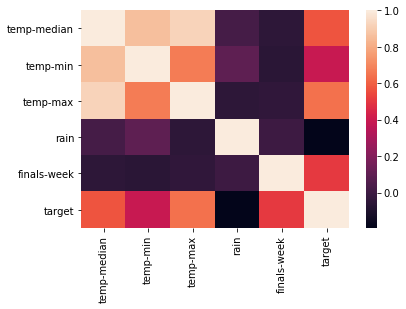

In [49]:
import seaborn as sns
sns.heatmap(df.corr(), 
#             center=0
           )

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.245e+04
Date:                Fri, 19 Jul 2019   Prob (F-statistic):               0.00
Time:                        12:56:07   Log-Likelihood:                -856.04
No. Observations:                 365   AIC:                             1718.
Df Residuals:                     362   BIC:                             1730.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temp-max        0.8991      0.006    147.698      0.000       0.887       0.911
rain           -0.0482      0.011     -4.525      0.000      -0.069      -0.027
finals-week     5.4950      0.291     18.854      0.000       4.922       6.068
==============================================================================
Omnibus:                       17.939   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.568
Skew:                          -0.208   Prob(JB):                      0.00836
Kurtosis:                       2.325   Cond. No.                         60.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What's the actual multivariable  linear regression equation with the coefficients?

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$ 

#### Step 3: Assess the model fit
Demonstrate and Apply:

**Discussion:**

In groups of 2 or 3 write a synopsis of the following summary

* What can you say about the coefficients?

* What do the p-values tell us?

* What does R^2 represent

* What other insights do you notice?





#### Step 4: Validate the model 
![scikit](https://cdn-images-1.medium.com/max/1200/1*-FHtcdQljtGKQGm77uDIyQ.png)
- Build LinReg Model with Scikit-Learn
- Check some of the linear regression assumptions


In [53]:
linreg = LinearRegression()

In [54]:
X = df.drop("target", axis=1)
y = df.target

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [62]:
X_test.shape

(73, 5)

In [63]:
# use fit to form model
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
# gives you r squared of the model
linreg.score(X_test, y_test)

0.7026274781258279

`score` here returns the R^2. 

How does it differ from when you use the whole dataset?

### Integration:

Repeat this process for concrete mixture. the documentation can be found [here](http://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength)
![test](building-construction-building-site-constructing-small.jpg)

In [ ]:
df2 = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')

In [ ]:
df2.head()
df2.info()

### Assessment

### Reflection

### Resources

Resources
https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86

Full code implementation of Linear Regression
Full code — https://github.com/SSaishruthi/Linear_Regression_Detailed_Implementation

Multiple regression explained
https://www.statisticssolutions.com/what-is-multiple-linear-regression/


## Dealing with Categorical Variables

In [80]:
df = pd.read_csv('Consumo_cerveja.csv', decimal=",", parse_dates=['Data'])
df['Consumo de cerveja (litros)'] = pd.to_numeric(df['Consumo de cerveja (litros)'])
df['day-of-week'] = df.Data.dt.dayofweek
df.dropna(inplace=True)
df.drop(['Data'], inplace=True, axis=1)
df.columns = ['temp-average', 'temp-min', 'temp-max', 'rain', 'weekend', 'target', 'day-of-week']
# drop colinear data
df.drop(['temp-average', 'temp-min', 'weekend'], inplace=True, axis=1)

In [81]:
df.head()

,temp-max,rain,target,day-of-week
0,32.5,0.0,25.461,3.0
1,33.5,0.0,28.972,4.0
2,29.9,0.0,30.814,5.0
3,28.6,1.2,29.799,6.0
4,28.3,0.0,28.900,0.0


In [83]:
# drop_first drops one of the seven days. Why?
df = pd.get_dummies(df, columns=['day-of-week'], drop_first=True)
df.head()

,temp-max,rain,target,day-of-week_1.0,day-of-week_2.0,day-of-week_3.0,day-of-week_4.0,day-of-week_5.0,day-of-week_6.0
0,32.5,0.0,25.461,0,0,1,0,0,0
1,33.5,0.0,28.972,0,0,0,1,0,0
2,29.9,0.0,30.814,0,0,0,0,1,0
3,28.6,1.2,29.799,0,0,0,0,0,1
4,28.3,0.0,28.900,0,0,0,0,0,0


In [84]:
model = sm.OLS(df.target, df.drop(['target'], axis=1)).fit()

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     4722.
Date:                Fri, 19 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:58:37   Log-Likelihood:                -851.51
No. Observations:                 365   AIC:                             1719.
Df Residuals:                     357   BIC:                             1750.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
temp-max            0.8693      0.012     69.991      0.000       0.845       0.894
rain               -0.0460      0.011     -4.317      0.000      -0.067      -0.025
day-of-week_1.0     1.2155      0.479      2.540      0.012       0.274       2.157
day-of-week_2.0     0.9924      0.476      2.085      0.038       0.056       1.928
day-of-week_3.0     1.0044      0.475      2.113      0.035       0.069       1.939
day-of-week_4.0     0.8568      0.480      1.785      0.075      -0.087       1.801
day-of-week_5.0     6.0472      0.475     12.720      0.000       5.112       6.982
day-of-week_6.0     6.4922      0.473     13.738      0.000       5.563       7.422
==============================================================================
Omnibus:                       17.503   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.004
Skew:                          -0.183   Prob(JB):                       0.0111
Kurtosis:                       2.323   Cond. No.                         181.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""